# Artififcial Intelligence Sentiment Analysis In Marketing
In today's dynnamic digital environment, Businesses must embrace artificial intelligence (AI) to remain competitive. This project explores AI and sentiment analysis in marketing, with a focus on amazon customer reviews. It impacts essential data science concept to help with the understanding for data science related jobs.

# Project Overview
Mission: We're going to construct, train, evaluate and deploy an AI model predicting sentiment from real time Amazon Echo customer Reviews. We'll be using python libraries like Scikit_Learn, Pandas, Matplotlib and Seaborn. To help with the analysis and visualization.

# Project Overview
Mission: We're going to construct, train, evaluate and deploy an AI model predicting sentiment from real time Amazon Echo customer Reviews. We'll be using python libraries like Scikit_Learn, Pandas, Matplotlib and Seaborn. To help with the analysis and visualization.

# Sentiment Analysis: An Overview
Sentiment analysis can also be referred as opinion minning. It's also a powerful technique within the Natural Language Processing (NLP). As it's root, sentiment analysis involves teaching machines to understand and interpret human emotions and opinions expressed within text. 

# Data Source: www.kaggle.com/slid321/amazon-alexa-reviews

# Importing Necessary Libraries

In [2]:
# Data Analysis and Visualiztion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Text Processing
import string 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Spliting and Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [3]:
pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 262.6 kB/s eta 0:00:41
   ---------------------------------------- 0.0/10.6 MB 262.6 kB/s eta 0:00:41
   ---------------------------------------- 0.1/10.6 MB 273.8 kB/s eta 0:00:39
   ---------------------------------------- 0.1/10.6 MB 302.7 kB/s eta 0:00:35
   ---------------------------------------- 0.1/10.6 MB 350.1 kB/s eta 0:00:31
   ---------------------------------------- 0.1/10.6 MB 328.2 kB/s eta 0:00:33
    --------------------------------------- 0.1/10.6 MB 388.1 kB/s eta 0:00:27
    -------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
mydata=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [7]:
mydata.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [8]:
mydata.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


# Data Inspection

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [10]:
print(mydata.columns)


Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


In [11]:
# Display the first 5 full reviews with the space in-between them
for index, row in mydata.head(5).iterrows():
    print(f"Review {index + 1}: {row['verified_reviews']}\n")


Review 1: Love my Echo!

Review 2: Loved it!

Review 3: Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.

Review 4: I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.

Review 5: Music



# Data Processing

In [28]:
# Checking for null value in the dataset
null_mask= mydata.isnull()
null_values=null_mask.sum().sum()
print("Number of Null_values are:", null_values)

Number of Null_values are: 1


# Exploratory Data Analysis 
The exploratory data analysis is very importanat to our data science journey. It helps us to carryout visualization and subsequent analysis

In [30]:
# Summary Statistics
mydata.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [31]:
# Distribution of Sentiments
mydata["feedback"].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

In [34]:
mydata["rating"].value_counts().sort_index()

rating
1     161
2      96
3     152
4     455
5    2286
Name: count, dtype: int64

In [35]:
mydata["variation"].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

# Data Visualization
Visualizing data is a powerful way to get insight, find patterns and communicate complex information in a simple manner

<function matplotlib.pyplot.show(close=None, block=None)>

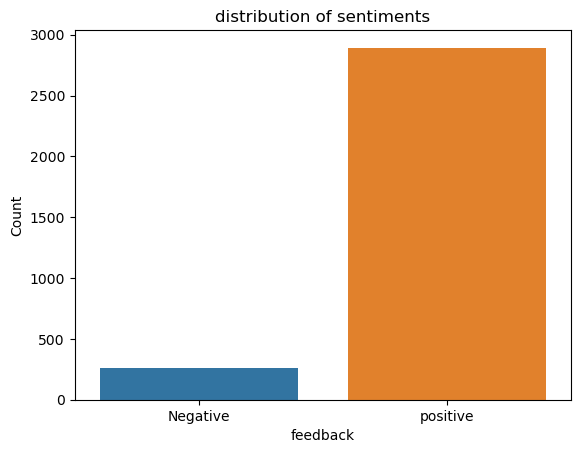

In [41]:
# Distribution of sentiments (Feedback)

sns.countplot(data=mydata, x="feedback")
plt.title('distribution of sentiments')
plt.ylabel('Count')
plt.xticks([0,1], ['Negative', 'positive'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

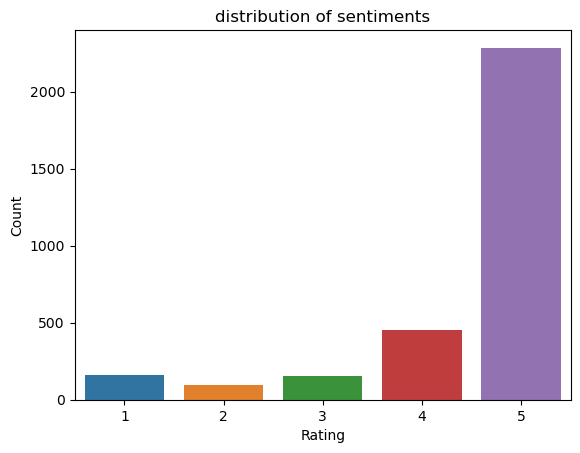

In [42]:
# Distribution of sentiments (RATINGS)

sns.countplot(data=mydata, x="rating")
plt.title('distribution of sentiments')
plt.ylabel("Count")
plt.xlabel("Rating")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

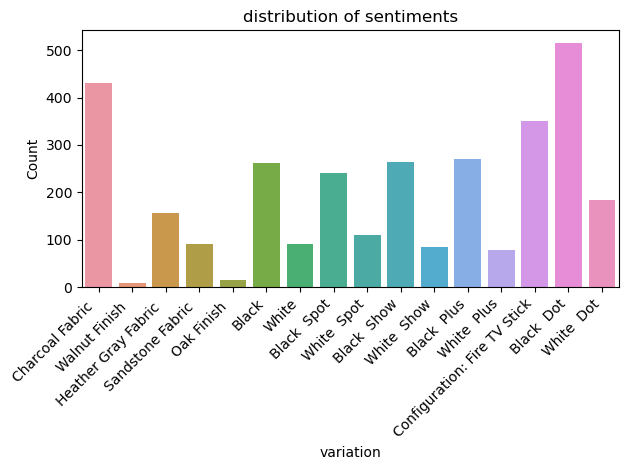

In [43]:
# Distribution of sentiments (VARIATIONS)

sns.countplot(data=mydata, x="variation")
plt.title('distribution of sentiments')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show

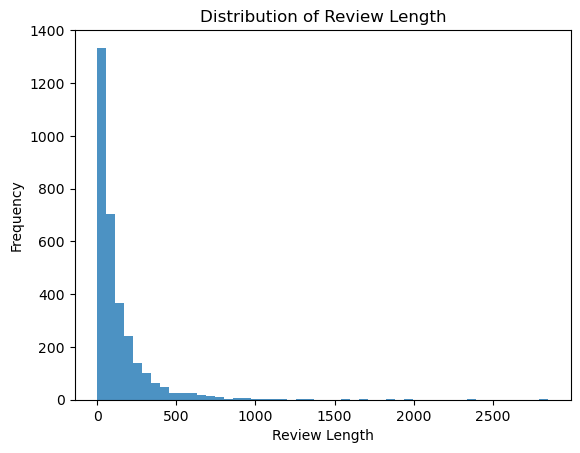

In [45]:
# Distribution of review length

import matplotlib.pyplot as plt

# Assuming mydata is your DataFrame
mydata["review_length"] = mydata["verified_reviews"].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

plt.hist(mydata["review_length"], bins=50, alpha=0.8)
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.title("Distribution of Review Length")
plt.show()


# Visualizing Textual Insight Through WordCloud


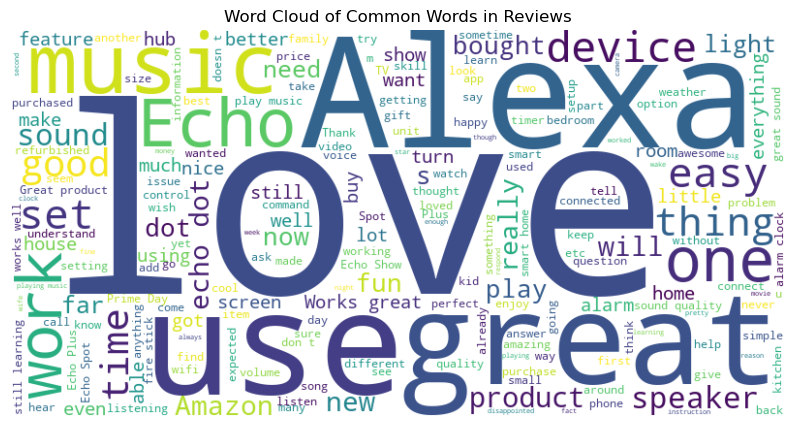

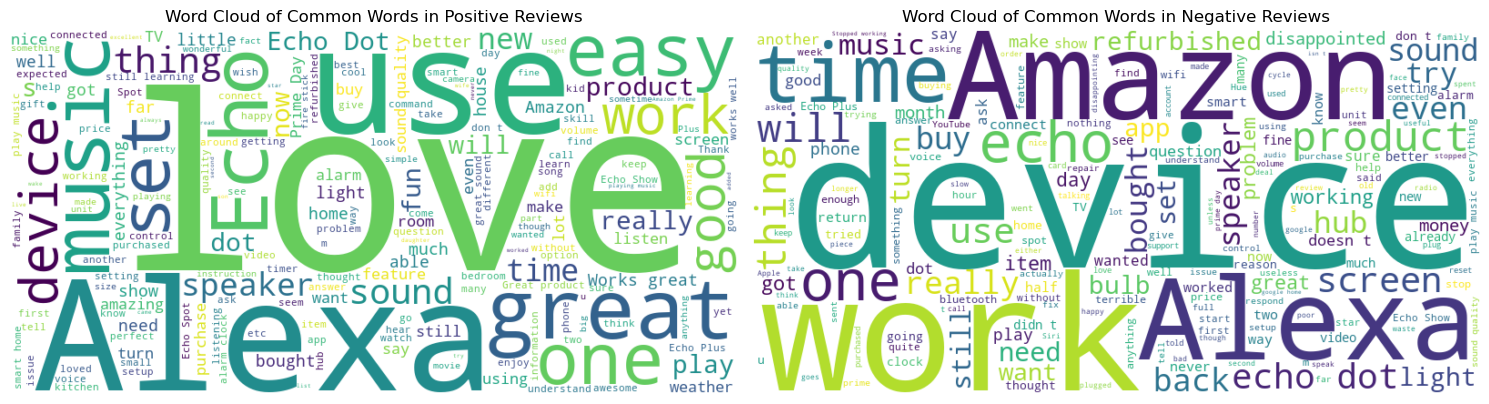

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(mydata['verified_reviews'].astype(str))  # Make sure the reviews are strings

# Generate a word cloud of the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Reviews')
plt.show()

# Separate positive and negative reviews for analysis
positive_reviews = ' '.join(mydata[mydata['feedback'] == 1]['verified_reviews'].astype(str))
negative_reviews = ' '.join(mydata[mydata['feedback'] == 0]['verified_reviews'].astype(str))

# Generate separate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot the word clouds for positive and negative reviews
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Negative Reviews')

plt.tight_layout()
plt.show()


# Text Processing


In [50]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
ENGLISH_STOP_WORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [52]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Assuming you have defined ENGLISH_STOP_WORDS somewhere in your code
# ENGLISH_STOP_WORDS = set(stopwords.words('english'))

def preprocess_text(text):
    # Check if the text is a string, otherwise return an empty string
    if isinstance(text, str):
        # Tokenization (split text into words)
        words = text.split()

        # Remove punctuation and convert to lowercase
        words = [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in words]

        # Remove Scikit-learn's English stopwords
        words = [word for word in words if word not in ENGLISH_STOP_WORDS]

        # Stemming (reduces words to their root form)
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]

        # Reconstruct Preprocessed Text
        preprocessed_text = ' '.join(words)
        return preprocessed_text
    else:
        return ''

# Apply preprocessing to the 'verified_reviews' Column
mydata['preprocessed_reviews'] = mydata['verified_reviews'].apply(preprocess_text)


# Feature Extraction Using TF-IDF In Sentiment Analysis

In [53]:
# Feature Extraction Using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(mydata['preprocessed_reviews']).toarray()


In [54]:
# Display the first 10 preprocessed reviews and their corresponding TF-IDF features
for index, row in mydata.head(2).iterrows():
    print(f"Review{index + 1}(Preprocessed):{row['preprocessed_reviews']}")
    print(f"TF-IDF Features: {X[index]}\n")

Review1(Preprocessed):love echo
TF-IDF Features: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.    

# Model Selection And Training In Sentiment Analysis

In [55]:
# Spliting Data Into Training And Testing Sets
#X = mydata['preprocessed_reviews']
y = mydata['feedback']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

The train_model function streamlines model training. It takes 

In [60]:
# Model Training 
def train_model(X_train,y_train,model_type):
    if model_type == 'logistic_regression':
        model = LogisticRegression(max_iter=1000, random_state=42)
    elif model_type == 'multinomial_nb':
        model = MultinomialNB()
    else:
        raise ValueError("Invalid model type")
    model.fit(X_train, y_train)
    return model

# Train Logistics Regression Model
logistic_regression_model = train_model(X_train, y_train, model_type='logistic_regression')

# Train Multinomial Bayes Model
multinomial_nb_model = train_model(X_train, y_train, model_type='multinomial_nb')

# Train Logistics Regression Model
logistic_regression_model = train_model(X-train,y_train,model_type='multinomial_nb')

# Train Multinomial Naive Bayes Model
multinomial_nb_model = train_model(X_train, y_train, model_type='multinomial_nb)

In [61]:
# Model Prediction and Evaluation
def evaluate_model_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division = 1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division = 1)
    return accuracy, precision, recall, f1

# Evaluate Logistic Regression Model
logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall, logistic_regression_f1 = evaluate_model_predictions(logistic_regression_model, X_test,y_test)

# Evaluate Multinomial Naive Bayes Model
multinomial_nb_accuracy, multinomial_nb_precision, multinomial_nb_recall, multinomial_nb_f1 = evaluate_model_predictions(multinomial_nb_model, X_test, y_test)

# Display Evaluation Metrics For Logistic Regression Model
print("Logistic Regression Model Evaluation:\n")
print(f"Accuracy: {logistic_regression_accuracy:.2f}")
print(f"Precision: {logistic_regression_precision:.2f}")
print(f"Recall: {logistic_regression_recall:.2f}")
print(f"F1-Score: {logistic_regression_f1:.2f}")

# Display Evaluation Metrics For Multinmial Naive Bayes Model
print("\nMultinomial Naive Bayes Model Evaluation:\n")
print(f"Accuracy: {multinomial_nb_accuracy:.2f}")
print(f"Precision: {multinomial_nb_precision:.2f}")
print(f"Recall: {multinomial_nb_recall:.2f}")
print(f"F1-Score: {multinomial_nb_f1:.2f}")

Logistic Regression Model Evaluation:

Accuracy: 0.91
Precision: 0.91
Recall: 1.00
F1-Score: 0.95

Multinomial Naive Bayes Model Evaluation:

Accuracy: 0.91
Precision: 0.91
Recall: 1.00
F1-Score: 0.95
